In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("modis_flood_features_cleaned_v1.1.csv")

In [ ]:
df.head()

,date,lon,lat,flooded,jrc_perm_water,precip_1d,precip_3d,NDVI,NDWI,landcover,elevation,slope,aspect,upstream_area,TWI,target
0,2003-12-10,120.478677,-6.495942,1.0,1.0,9.645125,28.935376,6190.93062,-0.051446,17.0,0.0,0.116685,270.000000,0.031990,1.042098,0
1,2003-12-10,120.480923,-6.495942,1.0,1.0,9.645125,28.935376,6190.93062,-0.051446,17.0,1.0,0.839713,236.480074,0.031990,1.042098,0
2,2003-12-10,120.478677,-6.493697,0.0,1.0,9.645125,28.935376,6190.93062,0.028399,17.0,0.0,0.466730,270.000000,0.031990,1.042098,0
3,2003-12-10,120.480923,-6.493697,1.0,0.0,9.645125,28.935376,6190.93062,0.028399,17.0,4.0,0.939179,240.413746,0.021235,0.258796,1
4,2003-12-10,120.478677,-6.491451,0.0,1.0,9.645125,28.935376,6190.93062,-0.002506,17.0,0.0,0.583403,270.000000,0.031990,1.042098,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472156 entries, 0 to 1472155
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            1472156 non-null  object 
 1   lon             1472156 non-null  float64
 2   lat             1472156 non-null  float64
 3   flooded         1472156 non-null  float64
 4   jrc_perm_water  1472156 non-null  float64
 5   precip_1d       1472156 non-null  float64
 6   precip_3d       1472156 non-null  float64
 7   NDVI            1472156 non-null  float64
 8   NDWI            1472156 non-null  float64
 9   landcover       1472156 non-null  float64
 10  elevation       1472156 non-null  float64
 11  slope           1472156 non-null  float64
 12  aspect          1472156 non-null  float64
 13  upstream_area   1472156 non-null  float64
 14  TWI             1472156 non-null  float64
 15  target          1472156 non-null  int64  
dtypes: float64(14), int64(1), object(1)


In [ ]:
df.describe()

,lon,lat,flooded,jrc_perm_water,precip_1d,precip_3d,NDVI,NDWI,landcover,elevation,slope,aspect,upstream_area,TWI,target
count,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06,1.472156e+06
mean,1.201739e+02,-4.000813e+00,8.218355e-02,7.043955e-02,1.156118e+01,4.201858e+01,6.190931e+03,2.533618e-01,1.057353e+01,1.832088e+02,1.659294e+00,1.604946e+02,1.143953e+01,1.675676e+00,3.377359e-02
std,5.081198e-01,1.043846e+00,2.746442e-01,2.558864e-01,1.422639e+01,3.113080e+01,1.927959e+03,1.095850e-01,4.040451e+00,3.597934e+02,2.254702e+00,1.046169e+02,1.255950e+02,2.771383e+00,1.806460e-01
min,1.193535e+02,-6.495942e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+03,-3.859591e-01,1.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,8.494144e-03,-4.436093e+00,0.000000e+00
25%,1.198252e+02,-4.838551e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.084535e+01,5.168000e+03,1.910339e-01,8.000000e+00,1.400000e+01,3.487071e-01,7.161426e+01,1.278535e-02,-2.948727e-01,0.000000e+00
50%,1.201373e+02,-4.048033e+00,0.000000e+00,0.000000e+00,7.655426e+00,3.885799e+01,6.628000e+03,2.578638e-01,1.200000e+01,3.800000e+01,8.442494e-01,1.593614e+02,3.198997e-02,1.042098e+00,0.000000e+00
75%,1.203462e+02,-2.895944e+00,0.000000e+00,0.000000e+00,1.939188e+01,5.886799e+01,7.669000e+03,3.270318e-01,1.400000e+01,1.480000e+02,2.093728e+00,2.495221e+02,2.262875e-01,3.124817e+00,0.000000e+00
max,1.217925e+02,-1.887585e+00,1.000000e+00,1.000000e+00,1.072884e+02,2.202191e+02,1.000000e+04,6.086701e-01,1.700000e+01,3.278000e+03,4.809125e+01,3.593481e+02,5.128528e+03,1.499660e+01,1.000000e+00


In [ ]:
df.isnull().sum()

,0
date,0
lon,0
lat,0
flooded,0
jrc_perm_water,0
precip_1d,0
precip_3d,0
NDVI,0
NDWI,0
landcover,0


In [ ]:
print(df['target'].value_counts())

target
0    1422436
1      49720
Name: count, dtype: int64


In [ ]:
#Ubah kolom date ke datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
print(f"Jumlah data sebelum pembersihan: {df.shape[0]} baris")

Jumlah data sebelum pembersihan: 1472156 baris


In [ ]:
#Cek apakah ada nilai yang tidak logis
print(df[df['elevation'] < 0])

              date         lon       lat  flooded  jrc_perm_water  precip_1d  \
1583    2003-12-10  119.362520 -5.404489      1.0             0.0  21.956064   
7472    2003-12-10  119.445615 -5.137241      0.0             0.0  21.357765   
9303    2003-12-10  119.506251 -5.069867      0.0             0.0  24.430202   
9410    2003-12-10  119.479301 -5.065375      1.0             0.0  13.373850   
10243   2003-12-10  119.481547 -5.029443      1.0             1.0  13.144815   
...            ...         ...       ...      ...             ...        ...   
1436443 2015-02-05  119.362520 -5.404489      0.0             0.0   0.000000   
1447745 2015-02-05  121.060336 -2.599500      0.0             1.0  22.856524   
1447953 2015-02-05  121.044616 -2.592762      0.0             0.0  28.789270   
1448115 2015-02-05  121.049107 -2.588271      0.0             1.0  28.789270   
1455868 2015-02-05  119.656719 -5.653772      1.0             0.0  16.066761   

         precip_3d        NDVI      NDW

Apa itu elevation?

elevation adalah ketinggian suatu titik dari permukaan laut, biasanya diukur dalam meter. elevasi itu dihitung dari mean sea level. Jadi, elevation positif berarti berada di atas permukaan laut, misalnya gunung, daratan. Elevation negatif berarti di bawah permukaan laut.

Elevation negatif secara teoritis hanya bisa terjadi di Laut Mati dan Lembah Danakil di Ethiopia


In [ ]:
df_cleaned = df[(df['elevation'] >= 0)]

In [ ]:
print(f"Jumlah data setelah pembersihan elevation: {df_cleaned.shape[0]} baris")

Jumlah data setelah pembersihan elevation: 1471050 baris


In [ ]:
print(df[df['TWI'] < 0])

              date         lon       lat  flooded  jrc_perm_water  precip_1d  \
5       2003-12-10  120.480923 -6.491451      0.0             1.0   9.645125   
13      2003-12-10  120.483169 -6.482468      0.0             0.0   9.645125   
15      2003-12-10  120.483169 -6.480222      0.0             0.0   9.645125   
17      2003-12-10  120.478677 -6.477976      0.0             1.0   9.645125   
18      2003-12-10  120.485415 -6.477976      0.0             0.0   9.645125   
...            ...         ...       ...      ...             ...        ...   
1472144 2015-02-05  120.065452 -2.040299      0.0             0.0   0.000000   
1472146 2015-02-05  120.166513 -2.040299      0.0             0.0   0.000000   
1472150 2015-02-05  120.159775 -2.035807      0.0             0.0   0.000000   
1472151 2015-02-05  119.993587 -2.033561      0.0             0.0   0.000000   
1472153 2015-02-05  120.067698 -2.033561      0.0             0.0   0.000000   

         precip_3d        NDVI      NDW

Apa itu TWI?

TWI adalah topographic wetness index (TWI) secara teoritis menggambarkan potensi akumulasi kelembaban berdasarkan topografi. TWI negatif dianggap tidak representatif untuk menggambarkan kondisi riil topografi di wilayah sulawesi selatan, terutama karena data tersebut digunakan untuk memodelkan potensi kejadian banjir yang berhubungan dengan akumulasi air, bukan kekeringan ekstrem. TWI negatif mungkin saja terjadi di Sulawesi Selatan, terutama di wilayah lereng curam dan kering esktrem. Namun, karena project ini berfokus prediksi banjir. TWI negatif dianggap kurang relevan atau bahkan mengganggu performa model.

In [ ]:
df_cleaned = df_cleaned[df_cleaned['TWI'] >= 0]

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025801 entries, 0 to 1472155
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1025801 non-null  datetime64[ns]
 1   lon             1025801 non-null  float64       
 2   lat             1025801 non-null  float64       
 3   flooded         1025801 non-null  float64       
 4   jrc_perm_water  1025801 non-null  float64       
 5   precip_1d       1025801 non-null  float64       
 6   precip_3d       1025801 non-null  float64       
 7   NDVI            1025801 non-null  float64       
 8   NDWI            1025801 non-null  float64       
 9   landcover       1025801 non-null  float64       
 10  elevation       1025801 non-null  float64       
 11  slope           1025801 non-null  float64       
 12  aspect          1025801 non-null  float64       
 13  upstream_area   1025801 non-null  float64       
 14  TWI             1025801

In [ ]:
# Simpan dataset hasil pembersihan TWI ke file baru
df_cleaned.to_csv("modis_flood_features_paling cleaning.csv", index=False)

print("✅ Dataset berhasil disimpan sebagai 'modis_flood_features paling cleaning.csv'")


✅ Dataset berhasil disimpan sebagai 'modis_flood_features paling cleaning.csv'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472156 entries, 0 to 1472155
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1472156 non-null  datetime64[ns]
 1   lon             1472156 non-null  float64       
 2   lat             1472156 non-null  float64       
 3   flooded         1472156 non-null  float64       
 4   jrc_perm_water  1472156 non-null  float64       
 5   precip_1d       1472156 non-null  float64       
 6   precip_3d       1472156 non-null  float64       
 7   NDVI            1472156 non-null  float64       
 8   NDWI            1472156 non-null  float64       
 9   landcover       1472156 non-null  float64       
 10  elevation       1472156 non-null  float64       
 11  slope           1472156 non-null  float64       
 12  aspect          1472156 non-null  float64       
 13  upstream_area   1472156 non-null  float64       
 14  TWI             14

In [ ]:
print(f"Jumlah data setelah pembersihan TWI: {df_cleaned.shape[0]} baris")

Jumlah data setelah pembersihan TWI: 1025801 baris


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025801 entries, 0 to 1472155
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1025801 non-null  datetime64[ns]
 1   lon             1025801 non-null  float64       
 2   lat             1025801 non-null  float64       
 3   flooded         1025801 non-null  float64       
 4   jrc_perm_water  1025801 non-null  float64       
 5   precip_1d       1025801 non-null  float64       
 6   precip_3d       1025801 non-null  float64       
 7   NDVI            1025801 non-null  float64       
 8   NDWI            1025801 non-null  float64       
 9   landcover       1025801 non-null  float64       
 10  elevation       1025801 non-null  float64       
 11  slope           1025801 non-null  float64       
 12  aspect          1025801 non-null  float64       
 13  upstream_area   1025801 non-null  float64       
 14  TWI             1025801

In [ ]:
# Buat salinan agar rapi
df_fe = df_cleaned.copy()

# Ekstrak fitur dari tanggal
df_fe['year'] = df_fe['date'].dt.year
df_fe['month'] = df_fe['date'].dt.month
df_fe['day'] = df_fe['date'].dt.day
df_fe['dayofweek'] = df_fe['date'].dt.dayofweek  # 0=Senin, 6=Minggu
df_fe['quarter'] = df_fe['date'].dt.quarter
df_fe['day_of_year'] = df_fe['date'].dt.dayofyear

# (Opsional) Hapus kolom date asli jika tidak dibutuhkan
df_fe = df_fe.drop(columns=['date'])

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025801 entries, 0 to 1472155
Data columns (total 21 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   lon             1025801 non-null  float64
 1   lat             1025801 non-null  float64
 2   flooded         1025801 non-null  float64
 3   jrc_perm_water  1025801 non-null  float64
 4   precip_1d       1025801 non-null  float64
 5   precip_3d       1025801 non-null  float64
 6   NDVI            1025801 non-null  float64
 7   NDWI            1025801 non-null  float64
 8   landcover       1025801 non-null  float64
 9   elevation       1025801 non-null  float64
 10  slope           1025801 non-null  float64
 11  aspect          1025801 non-null  float64
 12  upstream_area   1025801 non-null  float64
 13  TWI             1025801 non-null  float64
 14  target          1025801 non-null  int64  
 15  year            1025801 non-null  int32  
 16  month           1025801 non-null  int32  

In [ ]:
X = df_fe.drop(columns=['target', 'flooded','jrc_perm_water'])
y = df_fe['target']

In [ ]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Random Forest Baseline
rf = RandomForestClassifier(n_estimators=100,
                            class_weight='balanced',
                            random_state=42,
                            n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
import joblib
rf = RandomForestClassifier(n_estimators=100,
                            class_weight='balanced',
                            random_state=42,
                            n_jobs=-1)
rf.fit(X_train_scaled, y_train)
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')

In [ ]:
#Evaluasi Random Forest Baseline
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    195890
           1       0.81      0.61      0.69      9271

    accuracy                           0.98    205161
   macro avg       0.89      0.80      0.84    205161
weighted avg       0.97      0.98      0.97    205161

Confusion Matrix:
 [[194518   1372]
 [  3607   5664]]
ROC AUC Score: 0.9874339910376664


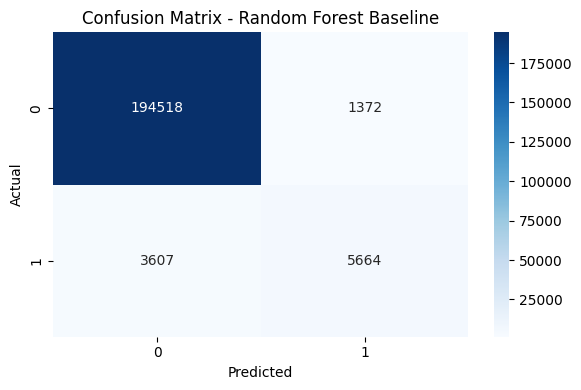

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest Baseline")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

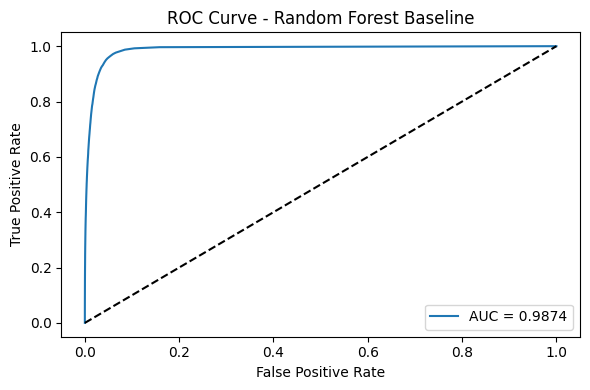

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Baseline")
plt.legend()
plt.tight_layout()
plt.show()

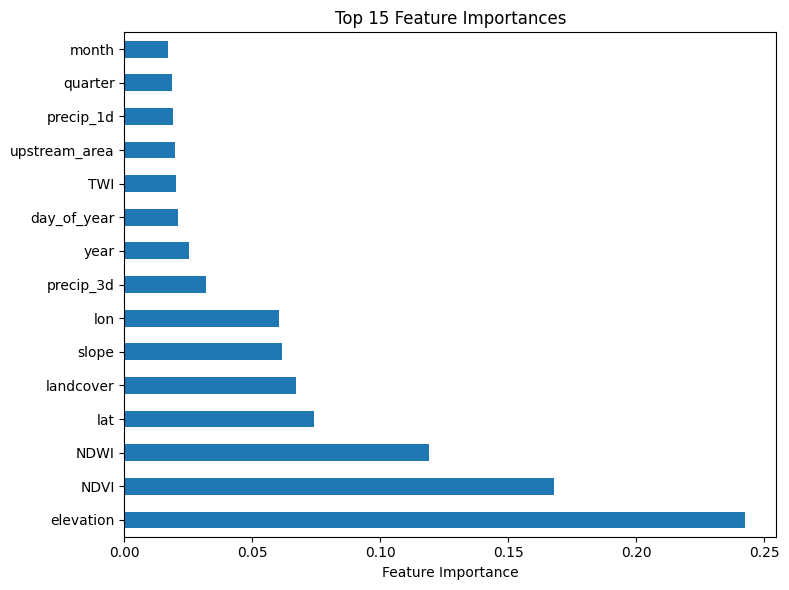

In [ ]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', figsize=(8,6), title="Top 15 Feature Importances")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
#Random Forest + SMOTE
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
#Evaluasi Random Forest + SMOTE
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    195890
           1       0.65      0.82      0.73      9271

    accuracy                           0.97    205161
   macro avg       0.82      0.90      0.86    205161
weighted avg       0.98      0.97      0.97    205161

Confusion Matrix:
 [[191804   4086]
 [  1625   7646]]
ROC AUC Score: 0.9875306081667404


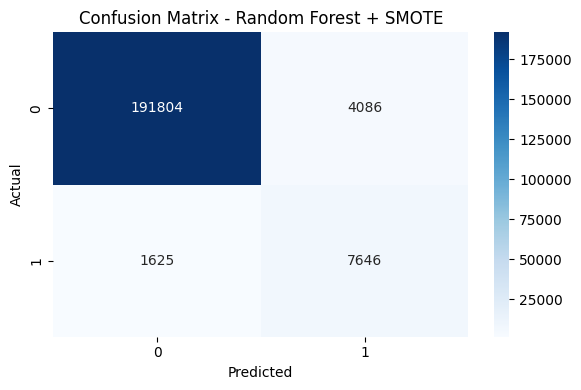

In [ ]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest + SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

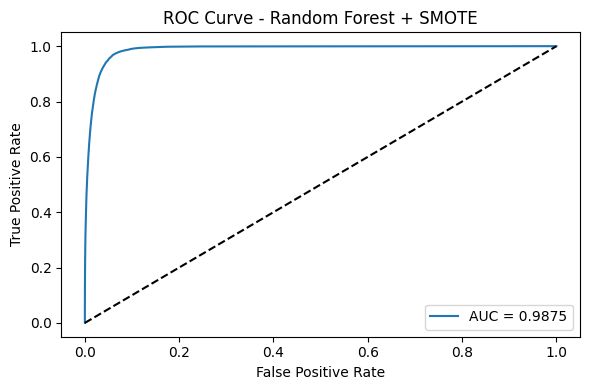

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest + SMOTE")
plt.legend()
plt.tight_layout()
plt.show()

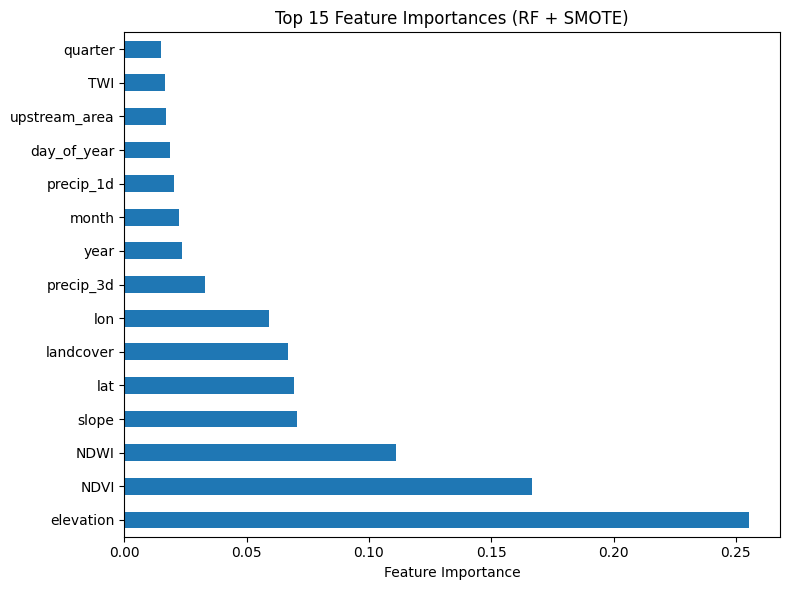

In [ ]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', figsize=(8,6), title="Top 15 Feature Importances (RF + SMOTE)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train_scaled, y_train)

In [ ]:
#Random Forest + ADASYN
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_ada, y_train_ada)
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
#Evaluasi Random Forest + ADASYN
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    195890
           1       0.65      0.83      0.73      9271

    accuracy                           0.97    205161
   macro avg       0.82      0.90      0.86    205161
weighted avg       0.98      0.97      0.97    205161

Confusion Matrix:
 [[191676   4214]
 [  1585   7686]]
ROC AUC Score: 0.9874488624966501


In [ ]:
#Visualisai Confusion Matrix Random Forest + ADASYN
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest + ADASYN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest + ADASYN")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', figsize=(8,6), title="Top 15 Feature Importances (RF + ADASYN)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()